# Linear Regressions

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

import sklearn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model as lm
from sklearn import model_selection as ms
sklearn.set_config(print_changed_only=False)

import xgboost

import import_ipynb
from _Self_Written_Functions_Sheet import rmse

importing Jupyter notebook from _Self_Written_Functions_Sheet.ipynb


In [2]:
hp_full_strd = pd.read_csv('..\hp_2a_ranked_edited_dum_full_train_red.csv', index_col=0)
hp_full_strd

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,Functional,GarageCond,GarageQual,HeatingQC,KitchenQual,MoSold,PavedDrive,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkComm,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CemntBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_WdShing,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY PUD - ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,0.25,1.000000,0.166667,0.8,0.50,0.666667,0.00,1.000000,0.6,0.6,1.00,0.666667,0.090909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.00,0.833333,0.166667,0.8,0.50,0.333333,0.00,1.000000,0.6,0.6,1.00,0.333333,0.363636,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.50,1.000000,0.166667,0.8,0.50,0.666667,0.00,1.000000,0.6,0.6,1.00,0.666667,0.727273,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [3]:
hp_logsaleprice = pd.read_csv('..\hp_1a_no_imputation_logsaleprice.csv', index_col=0)
hp_logsaleprice

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216
...,...
1453,12.072541
1454,12.254863
1455,12.493130
1456,11.864462


## Attempting Multilinear Regression

In [4]:
state = 0

# setting up train and test sets
xtrain, xtest, ytrain, ytest = ms.train_test_split(hp_full_strd,
                                                   hp_logsaleprice,
                                                   test_size=0.2,
                                                   random_state=state)

# Must flatten to fit
ytrain = ytrain.values.flatten()


# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [5]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
normilize = [True, False]
fitintercept = [True, False]
gparam_mlr_1 = {'fit_intercept': fitintercept, 'normalize': normilize}

# setting parameters
gs_mlr_1 = ms.GridSearchCV(lm, gparam_mlr_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_mlr_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_mlr_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_1, ytrain, xtrain)) 
test_rmse.append(rmse(gs_mlr_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_mlr_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df

Wall time: 2.45 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE,fit_intercept,normalize
0,0.432814,0.434189,0.298503,0.309662,-0.011159,False,True


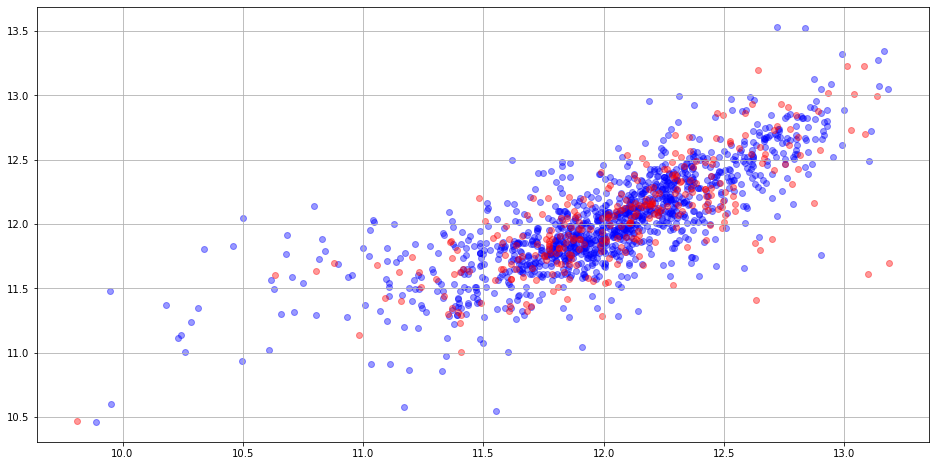

In [6]:
plt.figure(figsize=(16, 8))
plt.scatter(gs_mlr_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_mlr_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying with Lasso

In [7]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lasso = Lasso(random_state=state, max_iter=1000000, selection='random',
              normalize=True, fit_intercept=True)

# parameters to use
alphas = np.linspace(1e-4, 2.5e-4, 30)
gparam_lasso_1 = {'alpha': alphas}

# setting parameters
gs_lasso_1 = ms.GridSearchCV(lasso, gparam_lasso_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_lasso_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_lasso_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_lasso_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_lasso_1, ytrain, xtrain))
test_rmse.append(rmse(gs_lasso_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_lasso_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lasso_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lasso_res_df = pd.DataFrame(lasso_list_results).T
lasso_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lasso_res_df = pd.concat([lasso_res_df, best_par_df], axis=1, sort=False)

lasso_res_df

Wall time: 1.48 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha
0,0.84148,0.788135,0.157808,0.189488,-0.03168,0.0001


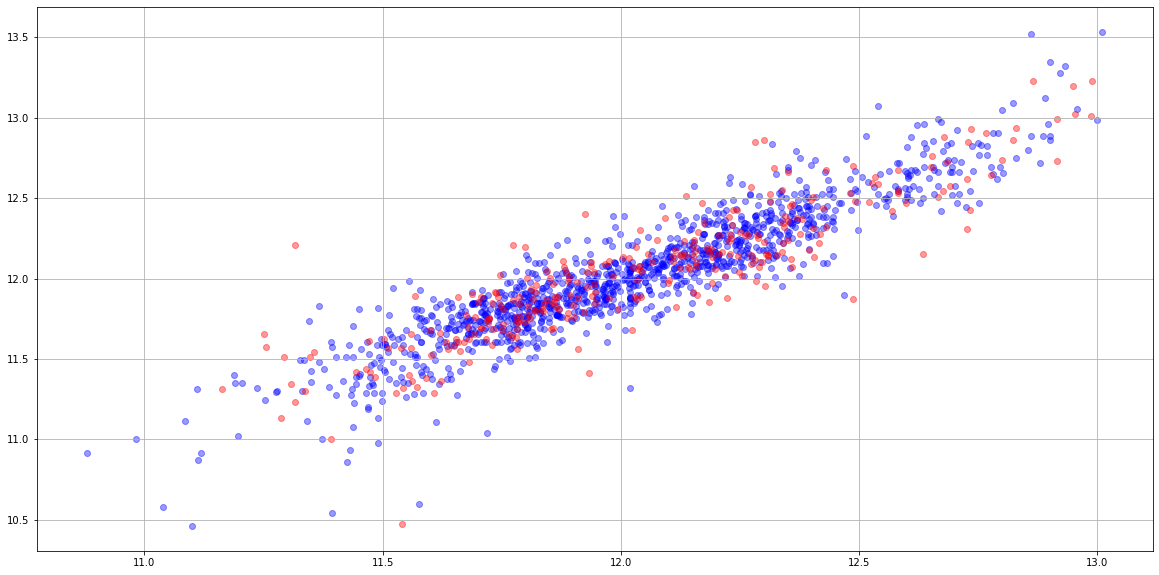

In [8]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_lasso_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_lasso_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

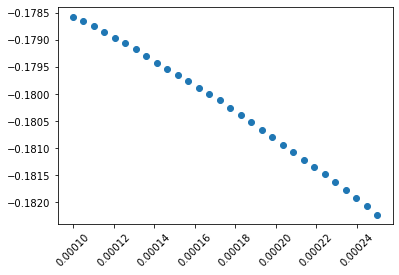

In [9]:
plt.xticks(rotation=45)
plt.scatter(gs_lasso_1.cv_results_['param_alpha'], gs_lasso_1.cv_results_['mean_test_score'])

## Using reduced DF hp_full_strd

In [10]:
lasso_coef_strd = pd.Series(gs_lasso_1.best_estimator_.coef_, index=hp_full_strd.columns)
print(lasso_coef_strd.abs().sort_values(ascending=False).to_string())

BsmtQual                                                            0.321182
KitchenQual                                                         0.300947
Neighborhood_NoRidge                                                0.290080
GarageQual                                                          0.269917
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                  0.248208
ExterQual                                                           0.242027
MSSubClass_2-1/2 STORY ALL AGES                                     0.211418
Neighborhood_StoneBr                                                0.210520
Exterior1st_BrkComm                                                 0.209306
MSSubClass_1-STORY 1945 & OLDER                                     0.173642
Neighborhood_MeadowV                                                0.160143
Neighborhood_NridgHt                                                0.155307
MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER    0.143163

In [11]:
lasso_coef_index_01 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) > 0]

hp_lasso_strd_reduced = hp_full_strd.iloc[:,lasso_coef_index_01]

# hp_lasso_strd_reduced.to_csv('..\hp_lasso_strd_reduced_2.csv')
hp_lasso_strd_reduced

,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Functional,GarageCond,GarageQual,HeatingQC,KitchenQual,PavedDrive,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_Stone,Exterior2nd_WdShing,FireplaceQu_Fa,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Wood,GarageType_Attchd,GarageType_CarPort,GarageType_Detchd,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RL,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blueste,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_ConLD,SaleType_ConLw,SaleType_WD
0,0.25,1.000000,0.166667,0.8,0.50,0.666667,1.000000,0.6,0.6,1.00,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.00,0.833333,0.166667,0.8,0.50,0.333333,1.000000,0.6,0.6,1.00,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.50,1.000000,0.166667,0.8,0.50,0.666667,1.000000,0.6,0.6,1.00,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.833333,0.166667,0.6,0.50,0.333333,1.000000,0.6,0.6,0.75,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.75,1.000000,0.166667,0.8,0.50,0.666667,1.000000,0.6,0.6,1.00,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

## features that were kept with lasso

In [12]:
list(hp_lasso_strd_reduced.columns)

['BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'ExterCond',
 'ExterQual',
 'Functional',
 'GarageCond',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'PavedDrive',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_Stone',
 'Exterior2nd_WdShing',
 'FireplaceQu_Fa',
 'FireplaceQu_None',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Wood',
 'GarageType_Attchd',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY PUD (Planned Unit Developmen

In [13]:
# columns that were dropped by lasso

lasso_coef_index_00 = [i for i, x in enumerate(lasso_coef_strd) if abs(x) == 0]
hp_lasso_strd_dropped = hp_full_strd.iloc[:, lasso_coef_index_00]
list(hp_lasso_strd_dropped.columns)

['Fence',
 'MoSold',
 'Condition1_Feedr',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Exterior1st_AsphShn',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior2nd_BrkComm',
 'Exterior2nd_CemntBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_Gd',
 'Foundation_Stone',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_None',
 'MSSubClass_1-1/2 STORY PUD - ALL AGES',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSZoning_RH',
 'MSZoning_RM',
 'MasVnrType_BrkFace',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_Mitchel',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'SaleCondition_AdjLand',
 'SaleCondition_Family',
 'SaleType_Con',
 'SaleType_ConLI',
 'SaleType_New',
 'SaleType_Oth']

## using the lasso reduced dataset in multilinear regression

In [14]:
# setting up train and test sets
xtrain_lso, xtest_lso, ytrain_lso, ytest_lso = ms.train_test_split(hp_lasso_strd_reduced,
                                                                   hp_logsaleprice,
                                                                   test_size=0.2,
                                                                   random_state=state)

# Must flatten to fit
ytrain_lso = ytrain_lso.values.flatten()


# using standard kfold split
n_folds = ms.KFold(n_splits=5, random_state=state, shuffle=True)

In [15]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

lm = LinearRegression()

# parameters to use
fitintercept = [True, False]
gparam_mlr_lso = {'fit_intercept': fitintercept}

# setting parameters
gs_mlr_lso = ms.GridSearchCV(lm, gparam_mlr_lso, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_mlr_lso.fit(xtrain_lso, ytrain_lso)

# setting up dataframe for results
train_scores.append(gs_mlr_lso.best_estimator_.score(xtrain_lso, ytrain_lso))
test_scores.append(gs_mlr_lso.best_estimator_.score(xtest_lso, ytest_lso))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_mlr_lso, ytrain_lso, xtrain_lso))
test_rmse.append(rmse(gs_mlr_lso, ytest_lso, xtest_lso))

# add the best parameters to the df
best_par_list.append(gs_mlr_lso.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
lm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
lm_res_df = pd.DataFrame(lm_list_results).T
lm_res_df.columns = ['TrainScores', 'TestScores', 'train_rmse', 'test_rmse', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
lm_res_df_sel2 = pd.concat([lm_res_df, best_par_df], axis=1, sort=False)

lm_res_df_sel2

Wall time: 28 ms


,TrainScores,TestScores,train_rmse,test_rmse,DiffRMSE,fit_intercept
0,0.84903,0.781867,0.154004,0.192271,-0.038267,True


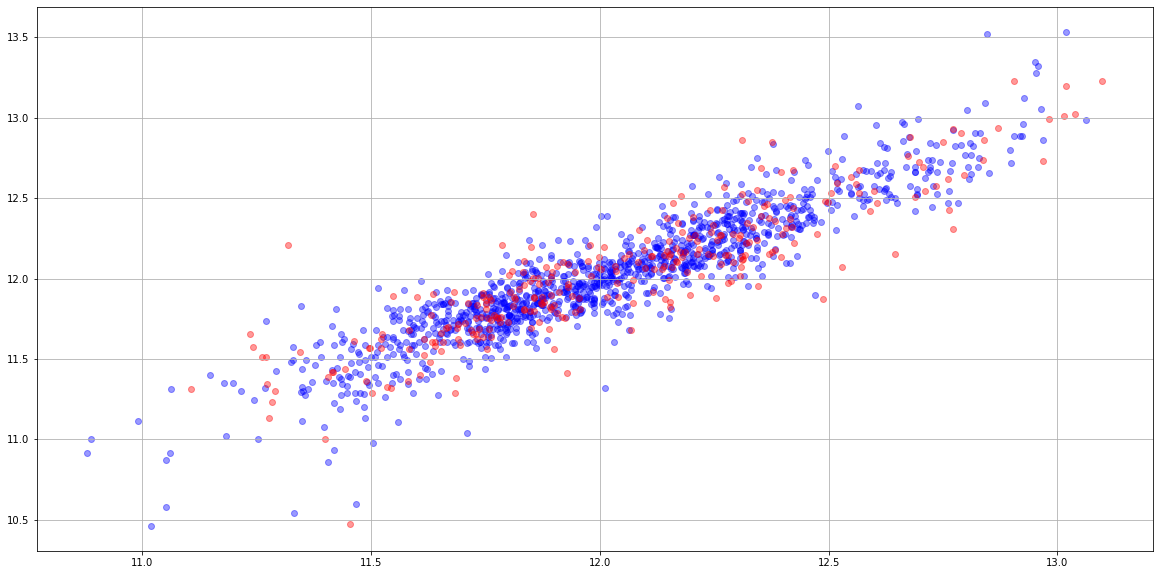

In [16]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtrain_lso), ytrain_lso, color='blue', alpha=0.4)
plt.scatter(gs_mlr_lso.best_estimator_.predict(xtest_lso), ytest_lso, color='red', alpha=0.4)
plt.grid(which='both')

- vast improvement compared to 1b

## Trying w Ridge

In [17]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

ridge = Ridge(random_state=state, max_iter=10000,
              normalize=True, fit_intercept=True)

# parameters to use
# alphas = np.linspace(1e-4, 2.5e-4, 30) 'alpha': alphas,
                  
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
fitintercept = [True, False]

gparam_ridge_1 = {'solver': solvers,
                  'fit_intercept': fitintercept, 
                  'random_state': [state]}

# setting parameters
gs_ridge_1 = ms.GridSearchCV(ridge, gparam_ridge_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_ridge_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_ridge_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_ridge_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_ridge_1, ytrain, xtrain))
test_rmse.append(rmse(gs_ridge_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_ridge_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
ridge_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
ridge_res_df = pd.DataFrame(ridge_list_results).T
ridge_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
ridge_res_df = pd.concat([ridge_res_df, best_par_df], axis=1, sort=False)

ridge_res_df

Wall time: 322 ms


C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.18844873 -0.18844873 -0.18844873 -0.18845312 -0.1884462  -0.18844816
 -0.18849906         nan -0.38401622 -0.38401622 -0.38401622 -0.38615489
 -0.4597163  -0.38426061 -0.38608984         nan]
  warnings.warn(
C:\Users\tdcho\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.17437637 -0.17437637 -0.17437637 -0.17438191 -0.17437786 -0.17437381
 -0.17444379         nan -0.31506652 -0.31506652 -0.31506652 -0.31690481
 -0.39338406 -0.31554787 -0.31735869         nan]
  warnings.warn(


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,fit_intercept,random_state,solver
0,0.802477,0.761673,0.176155,0.200973,-0.024818,True,0,sparse_cg


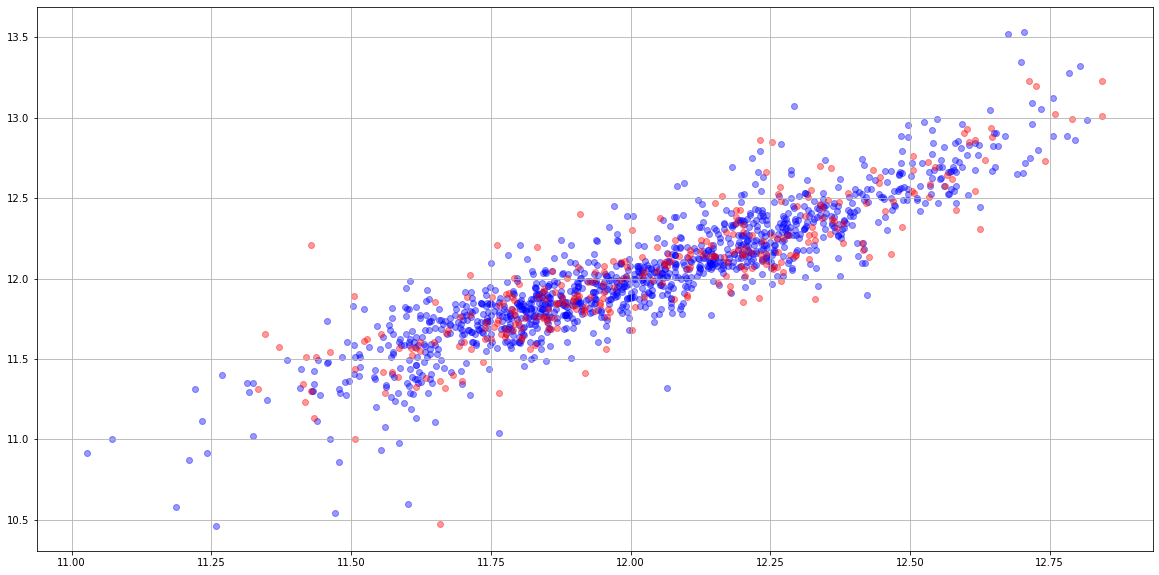

In [18]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_ridge_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_ridge_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

## Trying w ElasticNet

In [19]:
state = 0
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

enet = ElasticNet(random_state=state, max_iter=10000,
                  normalize=True, fit_intercept=True)

# parameters to use
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 0, 1, 10, 100]
l1ratio = [0, 0.25, 0.5, 0.75, 1]
fitintercept = [True, False]
precomputes = [True, False]
warmstart = [True, False]
selections = ['cyclic', 'random']

gparam_enet_1 = {'alpha': alphas,
                  'l1_ratio': l1ratio,
                  'fit_intercept': fitintercept,
                  'precompute': precomputes, 
                  'warm_start': warmstart,
                  'selection': selections,
                  'random_state': [state]}

# setting parameters
gs_enet_1 = ms.GridSearchCV(enet, gparam_enet_1, cv=n_folds, refit=True, n_jobs=-1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_enet_1.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_enet_1.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_enet_1.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_enet_1, ytrain, xtrain))
test_rmse.append(rmse(gs_enet_1, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_enet_1.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
enet_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
enet_res_df = pd.DataFrame(enet_list_results).T
enet_res_df.columns = ['TrainScores', 'TestScores', 'trainRMSE', 'testRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
enet_res_df = pd.concat([enet_res_df, best_par_df], axis=1, sort=False)

enet_res_df

Wall time: 38 s


,TrainScores,TestScores,trainRMSE,testRMSE,DiffRMSE,alpha,fit_intercept,l1_ratio,precompute,random_state,selection,warm_start
0,0.845173,0.789159,0.155959,0.18903,-0.033071,0.0001,True,0.5,True,0,cyclic,True


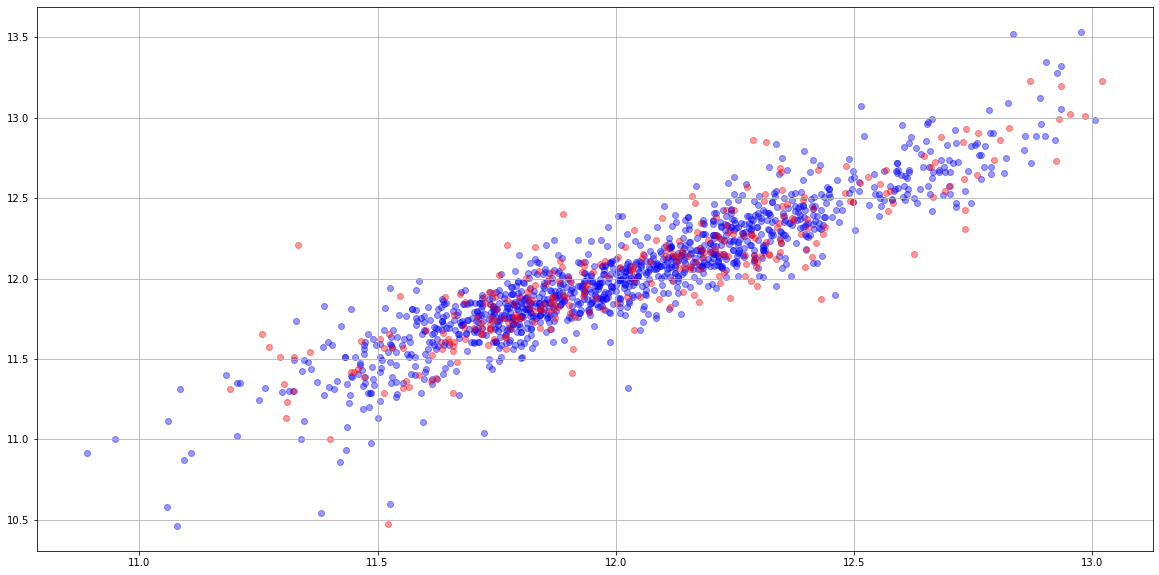

In [20]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_enet_1.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_enet_1.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

# Tree Models

In [21]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

rfr = RandomForestRegressor()

# parameters to use
# maxdepth = [10, 25, 50, 100, 250, 500]
# minsamlf = [1, 2, 3, 4, 5]
# minsamsplt = [2, 3, 4, 5]
# nestimators = [100, 250, 400, 500]
# oobscore = [True, False]
# warmstart = [True, False]
# 'max_depth': maxdepth,
#               'min_samples_leaf': minsamlf,
#               'min_samples_split': minsamsplt,
#               'n_estimators': nestimators,
#               'oob_score': oobscore,
#               'warm_start': warmstart

gparam_rfr = {}

# setting parameters
gs_rfr = ms.GridSearchCV(rfr, gparam_rfr, cv=n_folds, refit=True, n_jobs=-1,
                           scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_rfr.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_rfr.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_rfr.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_rfr, ytrain, xtrain))
test_rmse.append(rmse(gs_rfr, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_rfr.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
rfr_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
rfr_res_df = pd.DataFrame(rfr_list_results).T
rfr_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
rfr_res_df = pd.concat([rfr_res_df, best_par_df], axis=1, sort=False)

rfr_res_df

Wall time: 1.47 s


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.970072,0.774348,0.068568,0.195556,-0.126988


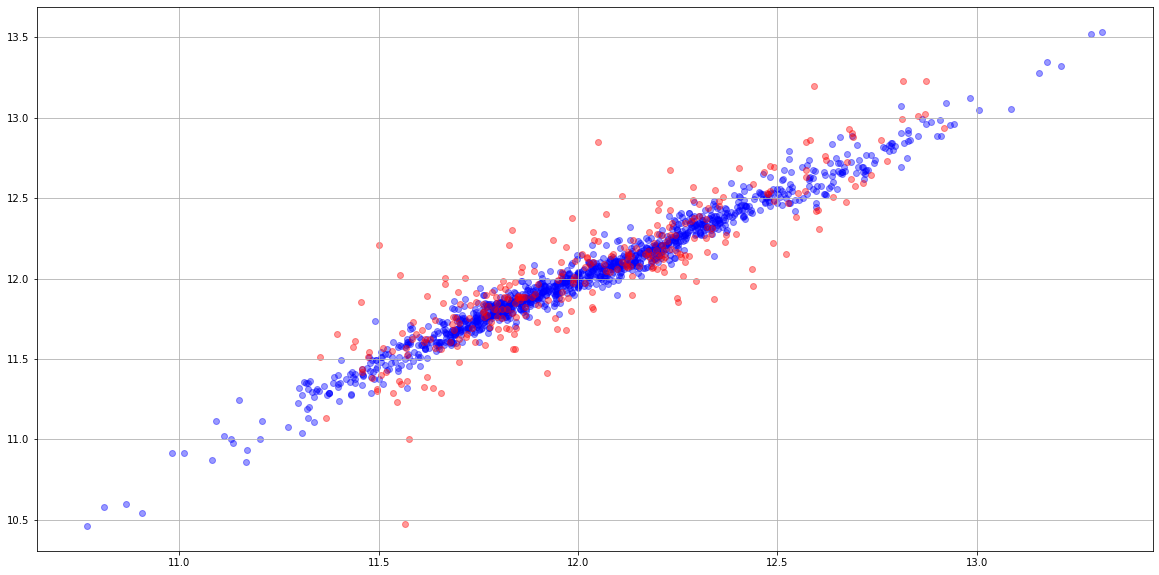

In [22]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_rfr.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_rfr.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [23]:
sorted_importance_rfr = sorted(zip(hp_full_strd.columns,
                                   gs_rfr.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_rfr

[('ExterQual', 0.32744156896911875),
 ('KitchenQual', 0.10182133713174517),
 ('BsmtQual', 0.09153883382751252),
 ('FireplaceQu_None', 0.0887895564309183),
 ('GarageCond', 0.03283919890576706),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.022174580649063278),
 ('MoSold', 0.021637233410838792),
 ('BsmtExposure', 0.018812117767512),
 ('BsmtFinType1', 0.018696508085781445),
 ('Neighborhood_NoRidge', 0.01804814947185826),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.015936464763437717),
 ('HeatingQC', 0.013505935527607664),
 ('MSZoning_RM', 0.012475841726500065),
 ('GarageType_Attchd', 0.010136814524569607),
 ('GarageType_Detchd', 0.009437158687340276),
 ('GarageQual', 0.008646900516805427),
 ('ExterCond', 0.008538800714059522),
 ('Fence', 0.008321145691982963),
 ('MSZoning_RL', 0.0050737397775863936),
 ('Neighborhood_IDOTRR', 0.004941753873068007),
 ('LotShape_Reg', 0.004856529498009142),
 ('PavedDrive', 0.004732393328138308),
 ('SaleCondition_Normal', 0.004662455735889485),
 ('Foundation_PConc', 0.00

In [24]:
filtered_sorted_importance_rfr = [x for x in sorted_importance_rfr if x[1]>0]
filtered_sorted_importance_rfr

[('ExterQual', 0.32744156896911875),
 ('KitchenQual', 0.10182133713174517),
 ('BsmtQual', 0.09153883382751252),
 ('FireplaceQu_None', 0.0887895564309183),
 ('GarageCond', 0.03283919890576706),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.022174580649063278),
 ('MoSold', 0.021637233410838792),
 ('BsmtExposure', 0.018812117767512),
 ('BsmtFinType1', 0.018696508085781445),
 ('Neighborhood_NoRidge', 0.01804814947185826),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.015936464763437717),
 ('HeatingQC', 0.013505935527607664),
 ('MSZoning_RM', 0.012475841726500065),
 ('GarageType_Attchd', 0.010136814524569607),
 ('GarageType_Detchd', 0.009437158687340276),
 ('GarageQual', 0.008646900516805427),
 ('ExterCond', 0.008538800714059522),
 ('Fence', 0.008321145691982963),
 ('MSZoning_RL', 0.0050737397775863936),
 ('Neighborhood_IDOTRR', 0.004941753873068007),
 ('LotShape_Reg', 0.004856529498009142),
 ('PavedDrive', 0.004732393328138308),
 ('SaleCondition_Normal', 0.004662455735889485),
 ('Foundation_PConc', 0.00

## Trying w GBR

In [25]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

gbm = GradientBoostingRegressor()

# learningrate = [0.01, 0.05, 0.1, 0.5, 1] # subsequently, fine tune
# nestimators = [5, 10, 50, 100, 200, 300, 400, 500]
# maxfeatures = [9, 20, 40, 60, 100, 150, 176]
# maxdepth = [1, 2, 3, 4, 5]
# 'learning_rate': learningrate,
#               'n_estimators': nestimators, 
#               'max_features': maxfeatures,
#               'max_depth': maxdepth

gparam_gbm = {}

gs_gbm = GridSearchCV(gbm, gparam_gbm, cv=n_folds, refit=True, n_jobs=-1, 
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_gbm.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_gbm.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_gbm.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_gbm, ytrain, xtrain))
test_rmse.append(rmse(gs_gbm, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_gbm.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
gbm_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
gbm_res_df = pd.DataFrame(gbm_list_results).T
gbm_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
gbm_res_df = pd.concat([gbm_res_df, best_par_df], axis=1, sort=False)

gbm_res_df

Wall time: 546 ms


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.8834,0.777278,0.135343,0.194283,-0.05894


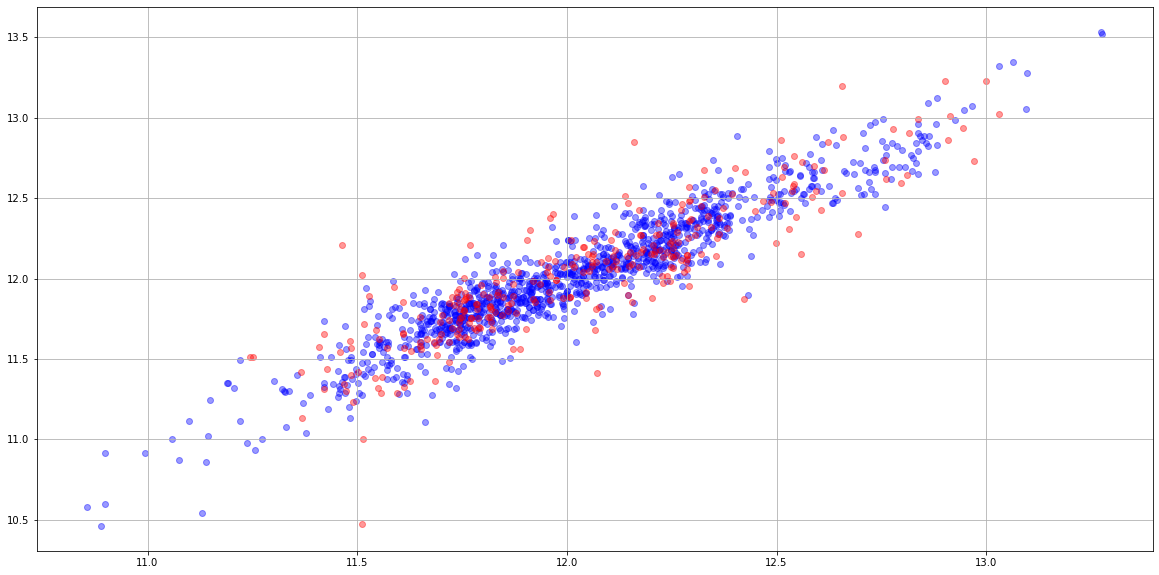

In [26]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_gbm.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_gbm.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [27]:
sorted_importance_gbm = sorted(zip(hp_full_strd.columns,
                                   gs_gbm.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('ExterQual', 0.2285297288904814),
 ('BsmtQual', 0.1918668081977424),
 ('KitchenQual', 0.1641542956316183),
 ('FireplaceQu_None', 0.09133762166635691),
 ('GarageCond', 0.033366273431020964),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.023981201495176453),
 ('BsmtExposure', 0.02358721780057359),
 ('GarageType_Attchd', 0.020455988428671544),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.018583482762748967),
 ('Neighborhood_NoRidge', 0.018349221470531658),
 ('BsmtFinType1', 0.016561174614122005),
 ('MSZoning_RM', 0.014048309357376191),
 ('HeatingQC', 0.012787886221112432),
 ('RoofStyle_Gable', 0.011264189576575928),
 ('Neighborhood_Crawfor', 0.008476426172362222),
 ('ExterCond', 0.00704937664681713),
 ('MSZoning_RL', 0.006854037569473459),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.00552980809057649),
 ('GarageQual', 0.005097915841842957),
 ('MasVnrType_None', 0.004692716630390119),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.0046708268580093705),
 ('Neighborhood_MeadowV', 0.004520737849604984),
 ('MSSubClas

In [28]:
filtered_sorted_importance_gbm = [x for x in sorted_importance_gbm if x[1]>0]
filtered_sorted_importance_gbm

[('ExterQual', 0.2285297288904814),
 ('BsmtQual', 0.1918668081977424),
 ('KitchenQual', 0.1641542956316183),
 ('FireplaceQu_None', 0.09133762166635691),
 ('GarageCond', 0.033366273431020964),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.023981201495176453),
 ('BsmtExposure', 0.02358721780057359),
 ('GarageType_Attchd', 0.020455988428671544),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.018583482762748967),
 ('Neighborhood_NoRidge', 0.018349221470531658),
 ('BsmtFinType1', 0.016561174614122005),
 ('MSZoning_RM', 0.014048309357376191),
 ('HeatingQC', 0.012787886221112432),
 ('RoofStyle_Gable', 0.011264189576575928),
 ('Neighborhood_Crawfor', 0.008476426172362222),
 ('ExterCond', 0.00704937664681713),
 ('MSZoning_RL', 0.006854037569473459),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.00552980809057649),
 ('GarageQual', 0.005097915841842957),
 ('MasVnrType_None', 0.004692716630390119),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.0046708268580093705),
 ('Neighborhood_MeadowV', 0.004520737849604984),
 ('MSSubClas

# Trying w XGBoost

In [29]:
train_scores = []
test_scores = []
train_rmse = []
test_rmse = []
best_par_list = []

xgb_t = xgboost.XGBRegressor()

# evalmetric = ['rmse']
# njobs = [-1]
# randomstate = [state]
# # booster_ = ['gbtree']

# nestimators = [1, 10, 20, 50, 100]
# minchildweight = [1, 3, 5]
# maxdepth = [1, 3, 5]
# learningrate = [0.01, 0.05, 0.1]
# gamma_ = [0.5, 1, 2, 5]
# subsample_ = [0.8, 1]
# # samplingmethod = ['uniform', 'gradient_based']
# colsamplebytree = [0.8, 1]
# lambda_ = [1, 3, 5]
# alpha_ = [1, 3, 5]
# 'eval_metric': evalmetric,
#                 'n_jobs': njobs,
# #                 'booster': booster_,
#                 'n_estimators': nestimators,
#                 'min_child_weight': minchildweight,
#                 'max_depth': maxdepth,
#                 'eta': learningrate,
#                 'gamma': gamma_,
#                 'subsample': subsample_,
# #                 'sampling_method': samplingmethod,
#                 'colsample_bytree': colsamplebytree,
#                 'lambda': lambda_,
#                 'alpha': alpha_,
#                 'random_state': randomstate


gparam_xgb_t = {}

gs_xgb_t = GridSearchCV(xgb_t, gparam_xgb_t, cv=n_folds, refit=True, verbose=1,
                      scoring='neg_root_mean_squared_error', return_train_score=True)

%time gs_xgb_t.fit(xtrain, ytrain)

# setting up dataframe for results
train_scores.append(gs_xgb_t.best_estimator_.score(xtrain, ytrain))
test_scores.append(gs_xgb_t.best_estimator_.score(xtest, ytest))

# use rmse function from Self_Written_Functions_Sheet_Recover
train_rmse.append(rmse(gs_xgb_t, ytrain, xtrain))
test_rmse.append(rmse(gs_xgb_t, ytest, xtest))

# add the best parameters to the df
best_par_list.append(gs_xgb_t.best_params_)

# find the difference btwn the rmses
diff_rmse = np.subtract(train_rmse, test_rmse)

# create dataframe
xgb_t_list_results = [train_scores, test_scores, train_rmse, test_rmse, diff_rmse]
xgb_t_res_df = pd.DataFrame(xgb_t_list_results).T
xgb_t_res_df.columns = ['TrainScores', 'TestScores', 'TrainRMSE', 'TestRMSE', 'DiffRMSE']
best_par_df = pd.DataFrame(best_par_list)
xgb_t_res_df = pd.concat([xgb_t_res_df, best_par_df], axis=1, sort=False)

xgb_t_res_df

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Wall time: 908 ms


,TrainScores,TestScores,TrainRMSE,TestRMSE,DiffRMSE
0,0.988898,0.737112,0.041762,0.211075,-0.169313


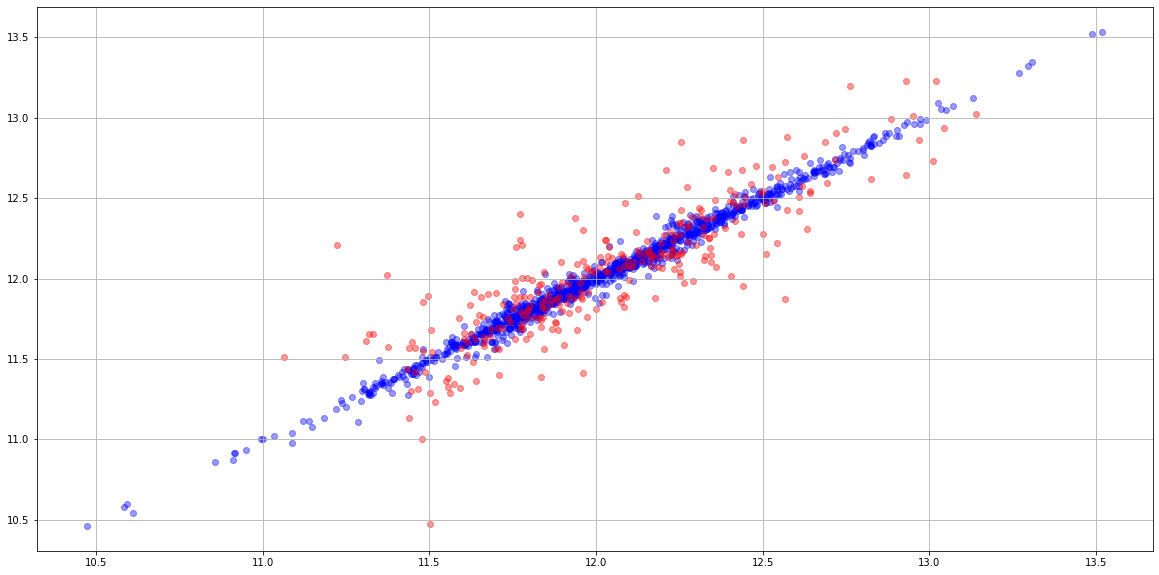

In [30]:
plt.figure(figsize=(20, 10))
plt.scatter(gs_xgb_t.best_estimator_.predict(xtrain), ytrain, color='blue', alpha=0.4)
plt.scatter(gs_xgb_t.best_estimator_.predict(xtest), ytest, color='red', alpha=0.4)
plt.grid(which='both')

In [31]:
sorted_importance_xgb_t = sorted(zip(hp_full_strd.columns,
                                   gs_xgb_t.best_estimator_.feature_importances_),
                               key=lambda t:t[1], reverse=True)
sorted_importance_xgb_t

[('FireplaceQu_None', 0.085556656),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.07478603),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.04614765),
 ('MSZoning_RM', 0.0436391),
 ('BsmtQual', 0.039865732),
 ('Neighborhood_NoRidge', 0.03807072),
 ('Exterior1st_BrkComm', 0.036405284),
 ('KitchenQual', 0.029076576),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', 0.023421982),
 ('Neighborhood_Crawfor', 0.018662084),
 ('ExterQual', 0.018030398),
 ('Exterior2nd_BrkFace', 0.017359037),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.015881753),
 ('FireplaceQu_Po', 0.015128789),
 ('Foundation_PConc', 0.014502816),
 ('Neighborhood_ClearCr', 0.014296812),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.013275443),
 ('GarageType_Attchd', 0.012425487),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', 0.012340927),
 ('GarageType_Basment', 0.012308117),
 ('Exterior1st_BrkFace', 0.012193905),
 ('Neighborhood_MeadowV', 0.011721771),
 ('GarageCond', 0.011631147),
 ('MSZoning_FV', 0.011506661),
 ('MSZoning_RL', 0.01102484),
 ('MSSubClass_1-S

In [32]:
filtered_sorted_importance_xgb_t = [x for x in sorted_importance_xgb_t if x[1]>0]
filtered_sorted_importance_xgb_t

[('FireplaceQu_None', 0.085556656),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.07478603),
 ('MSSubClass_2-STORY 1946 & NEWER', 0.04614765),
 ('MSZoning_RM', 0.0436391),
 ('BsmtQual', 0.039865732),
 ('Neighborhood_NoRidge', 0.03807072),
 ('Exterior1st_BrkComm', 0.036405284),
 ('KitchenQual', 0.029076576),
 ('MSSubClass_2-STORY PUD - 1946 & NEWER', 0.023421982),
 ('Neighborhood_Crawfor', 0.018662084),
 ('ExterQual', 0.018030398),
 ('Exterior2nd_BrkFace', 0.017359037),
 ('MSSubClass_2-1/2 STORY ALL AGES', 0.015881753),
 ('FireplaceQu_Po', 0.015128789),
 ('Foundation_PConc', 0.014502816),
 ('Neighborhood_ClearCr', 0.014296812),
 ('MSSubClass_2-STORY 1945 & OLDER', 0.013275443),
 ('GarageType_Attchd', 0.012425487),
 ('MSSubClass_DUPLEX - ALL STYLES AND AGES', 0.012340927),
 ('GarageType_Basment', 0.012308117),
 ('Exterior1st_BrkFace', 0.012193905),
 ('Neighborhood_MeadowV', 0.011721771),
 ('GarageCond', 0.011631147),
 ('MSZoning_FV', 0.011506661),
 ('MSZoning_RL', 0.01102484),
 ('MSSubClass_1-S

# Reduced List Does NOT Work Well